### Done as assignments for the microcredential in data science course. Copyright of the University of Houston HPE Data Science Institute.

### Load the dataset in the file named winequality_white.csv and produce at least one table and one graph that summarize the dataset statistics. Separate the data into training and testing datasets and set up a classification problem: predicting the quality value (a single variable with seven classes labeled 3, 4, 5, …, 9) based on the values of all the other variables in the file (acidity, alcohol, pH, etc.).

In [1]:
import pandas as pd
dataset = pd.read_csv('winequality-white.csv')
from IPython.display import display
display(dataset.head(5))
display(dataset.tail(5))
print('\n')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [2]:
print('Summary of the dataset - Univariate statistics')   
display(dataset.describe(include='all'))
print('\n')

Summary of the dataset - Univariate statistics


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [3]:
X_name = [ 'pH', 'residual sugar', 'alcohol','chlorides','citric acid','density','fixed acidity','volatile acidity','free sulfur dioxide','total sulfur dioxide','sulphates'] 
X = dataset[X_name]  
print('Statistical summary of X:')
display(X.describe())
print('\n')

Statistical summary of X:


,pH,residual sugar,alcohol,chlorides,citric acid,density,fixed acidity,volatile acidity,free sulfur dioxide,total sulfur dioxide,sulphates
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,3.188267,6.391415,10.514267,0.045772,0.334192,0.994027,6.854788,0.278241,35.308085,138.360657,0.489847
std,0.151001,5.072058,1.230621,0.021848,0.121020,0.002991,0.843868,0.100795,17.007137,42.498065,0.114126
min,2.720000,0.600000,8.000000,0.009000,0.000000,0.987110,3.800000,0.080000,2.000000,9.000000,0.220000
25%,3.090000,1.700000,9.500000,0.036000,0.270000,0.991723,6.300000,0.210000,23.000000,108.000000,0.410000
50%,3.180000,5.200000,10.400000,0.043000,0.320000,0.993740,6.800000,0.260000,34.000000,134.000000,0.470000
75%,3.280000,9.900000,11.400000,0.050000,0.390000,0.996100,7.300000,0.320000,46.000000,167.000000,0.550000
max,3.820000,65.800000,14.200000,0.346000,1.660000,1.038980,14.200000,1.100000,289.000000,440.000000,1.080000


Summary of X - Univariate graphs

Histograms:


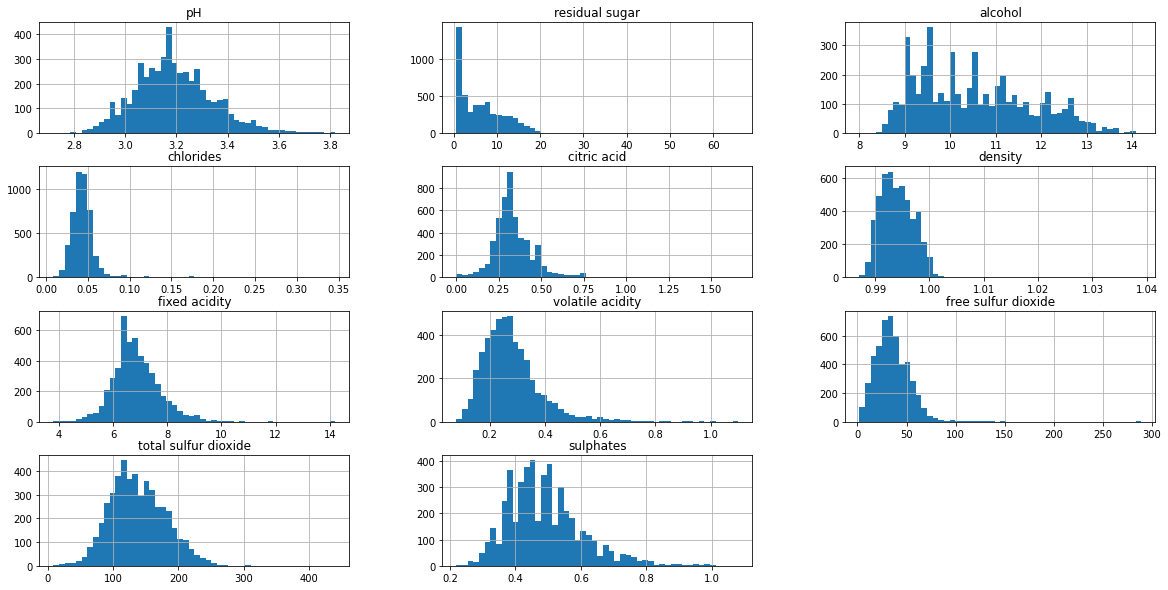

In [4]:
%matplotlib inline
import matplotlib.pyplot as pl  

print('Summary of X - Univariate graphs')
print()

print('Histograms:')
X.hist(figsize=(20,10), bins=50) 
pl.show()


In [5]:
y_name = 'quality'
y = dataset[y_name]
display(y.value_counts())

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [12]:
from sklearn import model_selection

test_pct = 0.20
seed = 7          
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_pct, random_state=seed)
print('done with setting aside data for testing')

done with setting aside data for testing


In [13]:
print('Working on model fitting...')

import sklearn  
from sklearn.neighbors import KNeighborsClassifier  

neigh = KNeighborsClassifier()  
neigh.fit(X_train, y_train) 
print('done with training the model')

Working on model fitting...
done with training the model


In [14]:
from sklearn.metrics import accuracy_score

print('computing accuracy...')
y_predicted = neigh.predict(X_test)   
print('Accuracy:', accuracy_score(y_test, y_predicted))

computing accuracy...
Accuracy: 0.46938775510204084


In [15]:
X_test.head(5)

,pH,residual sugar,alcohol,chlorides,citric acid,density,fixed acidity,volatile acidity,free sulfur dioxide,total sulfur dioxide,sulphates
3004,3.16,1.20,11.000000,0.034,0.36,0.99074,6.3,0.180,26.0,111.0,0.51
3222,3.01,1.10,12.000000,0.037,0.34,0.98990,6.6,0.160,41.0,115.0,0.68
4046,2.94,17.55,9.000000,0.050,0.28,0.99971,7.2,0.170,33.0,154.0,0.43
1170,3.38,4.50,9.900000,0.062,0.43,0.99660,7.7,0.250,20.0,115.0,0.50
4672,3.47,1.30,10.466667,0.036,0.14,0.99212,4.9,0.335,69.0,168.0,0.46


In [20]:
d = {'pH': [1.00], 'residual sugar': [17.55], 'alcohol': [10.0],'chlorides':[0.05],'citric acid':[0.4],'density':[0.98],'fixed acidity':[7.0],'volatile acidity':[0.2],'free sulfur dioxide':[20.0],'total sulfur dioxide':[100.0],'sulphates':[0.5]}
df=pd.DataFrame(data=d)

In [21]:
neigh.predict(df)

array([6], dtype=int64)

### Train and tune (via cross-validation) at least two different models based on Decision Trees (e.g., DecisionTreeClassifier, RandomForestClassifier); Consider at least two different hyperparameter options (e.g., tree depth).

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as pl  
from sklearn import model_selection 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
print('Loading data from file ...')  
dataset = pandas.read_csv('winequality-white.csv')
print('Removing rows with missing data ...')  
dataset = dataset.dropna()
print('Reading list of problem variables X and y...')
X_name =[ 'pH', 'residual sugar', 'alcohol','chlorides','citric acid','density','fixed acidity','volatile acidity','free sulfur dioxide','total sulfur dioxide','sulphates'] 
y_name = 'quality'
X = dataset[X_name]   
y = dataset[y_name]   


seed = 42 

print('Partitioning data into parts: formative (for development) and summative (for testing) ...')
test_size = 0.20  
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

print('done \n')

Loading data from file ...
Removing rows with missing data ...
Reading list of problem variables X and y...
Partitioning data into parts: formative (for development) and summative (for testing) ...
done 



In [10]:
scoring = 'f1_macro'

In [12]:
# Decision Tree
print('Tuning model...')
selected_model = DecisionTreeClassifier()
hyperparameters = {'max_depth':[4, 5, 6, 7], 'criterion':['gini', 'entropy'] }
clf = GridSearchCV(selected_model, hyperparameters, cv=5, scoring=scoring)
clf.fit(X_train, y_train)
print("Best hyperparameters found on development set for Decision Tree:")
print(clf.best_params_)
tuned_model_DT = clf.best_estimator_

print(f'Decision tree has maximum depth {tuned_model_DT.tree_.max_depth}.')
y_pred = tuned_model_DT.predict(X_test)
print( 'f1_score is')
print( f1_score(y_test, y_pred, average='macro') )

Tuning model...
Best hyperparameters found on development set for Decision Tree:
{'criterion': 'gini', 'max_depth': 7}
Decision tree has maximum depth 7.
f1_score is
0.2963277540166415


In [13]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
print('Tuning model...')
selected_model = RandomForestClassifier()
hyperparameters = {'max_depth':[4, 5,6,7], 'criterion':['gini', 'entropy'], 'n_estimators':[10, 50, 100] }
clf = GridSearchCV(selected_model, hyperparameters, cv=5, scoring=scoring)
clf.fit(X_train, y_train)
print("Best hyperparameters found on development set for Random Forest:")
print(clf.best_params_)
tuned_model_RF = clf.best_estimator_

y_pred = tuned_model_RF.predict(X_test)
print( 'f1_score is')
print( f1_score(y_test, y_pred, average='macro') )

Tuning model...
Best hyperparameters found on development set for Random Forest:
{'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 10}
f1_score is
0.31039306134945116


### Train and tune (via cross-validation) at least two different SVM models based on different kernel options (e.g., linear and sigmoid) and regularization parameters (different values of C).

In [19]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import svm

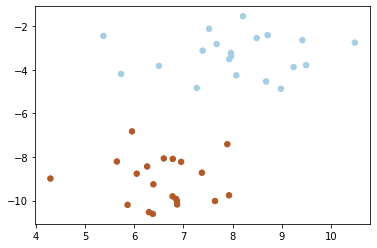

In [20]:
X, y = make_blobs(n_samples=40, centers=2, random_state=6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.show()

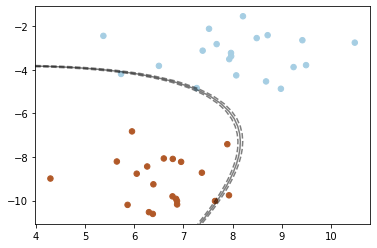

In [34]:
# checking diiferent parameters
#clf = svm.SVC(kernel='linear', C=0.01)   # large C means little to no regularization
#clf = svm.SVC(kernel='linear', C=1000)  # small C means regularization
clf = svm.SVC(kernel='sigmoid', C=1000)
#clf = svm.SVC(kernel='sigmoid', C=0.01)

clf.fit(X, y)

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot the decision function
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
plt.show()

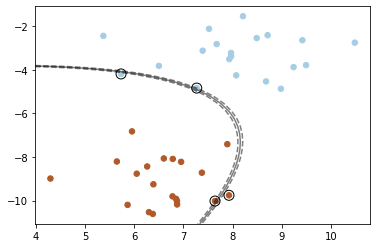

In [35]:
# plot the decision function
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

### Use the make_pipeline() method to study and describe the impact of feature selection on the performance of the tuned SVM from Step 3. You can try dimension reduction (e.g., using different n_component values for PCA) and/or data scaling (e.g., MinMaxScaler).

In [36]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [39]:

seed = 42 # setting the seed allows for repeatability
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
print('Reading list of algorithms to train ...')
models = []
models.append(( 'raw_SVM', SVC(random_state=seed) ))
models.append(( 'scaled_SVM', make_pipeline( MinMaxScaler(), SVC(random_state=seed) )  ))
print('done \n')

Reading list of algorithms to train ...
done 



In [40]:
models

[('raw_SVM', SVC(random_state=42)),
 ('scaled_SVM',
  Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                  ('svc', SVC(random_state=42))]))]

In [41]:

k4folds = 5
results = []
names = []
for name, model in models:   # Select each model in turn
    print(" ++ NOW WORKING ON ALGORITHM %s ++" % name)
    print("Splitting data into %s folds" % k4folds)
    kfold = model_selection.KFold(n_splits=k4folds, random_state=seed, shuffle=True)
    print("Training model on each split ...")
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring, verbose=3)
    results.append(cv_results)
    names.append(name)
    msg = "algorithm %s %s results: mean = %f (std = %f)" % (name, scoring, cv_results.mean(), cv_results.std())
    print(msg)
    
print('done \n')

 ++ NOW WORKING ON ALGORITHM raw_SVM ++
Splitting data into 5 folds
Training model on each split ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.105) total time=   0.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] END ................................ score: (test=0.111) total time=   0.6s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] END ................................ score: (test=0.141) total time=   0.6s
[CV] END ................................ score: (test=0.099) total time=   0.6s
[CV] END ................................ score: (test=0.123) total time=   0.6s
algorithm raw_SVM f1_macro results: mean = 0.115969 (std = 0.014971)
 ++ NOW WORKING ON ALGORITHM scaled_SVM ++
Splitting data into 5 folds
Training model on each split ...


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.223) total time=   0.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] END ................................ score: (test=0.268) total time=   0.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV] END ................................ score: (test=0.258) total time=   0.5s
[CV] END ................................ score: (test=0.213) total time=   0.5s
[CV] END ................................ score: (test=0.251) total time=   0.5s
algorithm scaled_SVM f1_macro results: mean = 0.242574 (std = 0.021082)
done 



[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.9s finished


### Question 5

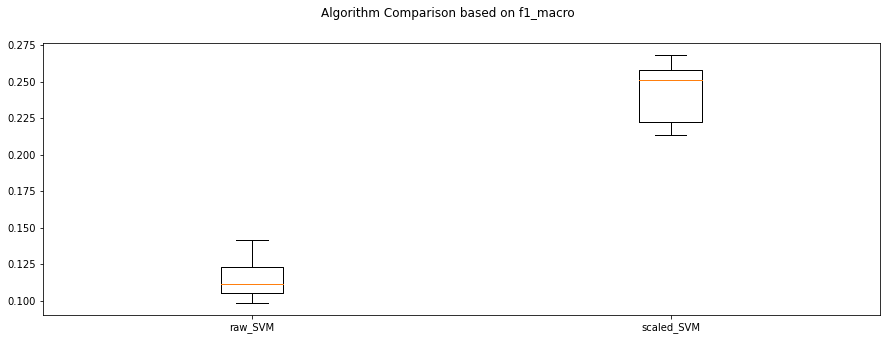

In [42]:
fig = pl.figure(figsize=(15,5))
fig.suptitle('Algorithm Comparison based on %s' % scoring)
ax = fig.add_subplot(111)
pl.boxplot(results)
ax.set_xticklabels(names)
pl.show()